In [ ]:
from quantif import quantif
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

0.515625
0.50115966796875


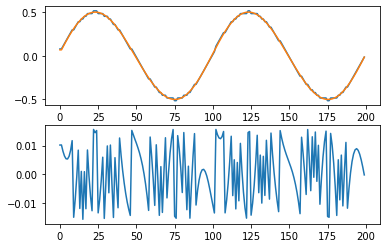

In [ ]:
'''
2. Pour N = 4 et A = 1, tracer le signal quantifié et le bruit de quantification
'''

n_bits = 6
pleine_echelle = 1

# read sound file
real_signal = np.array(sf.read('sine440.wav', dtype='float64'), dtype=object)

real_signal = real_signal[0]

# quantify signal variable
quantization_output, quant_step, quantizd_value = quantif(real_signal, pleine_echelle, n_bits)

#convert outputs to array
signal = np.array(quantization_output, dtype = object)

# get bruit
bruit = signal - real_signal

# Create pyplot figure and axes 
fig, axs = plt.subplots(2)

# ploting signals
axs[0].plot(signal[:200])
axs[0].plot(real_signal[:200])
axs[1].plot(bruit[:200])

print(max(signal))
print(max(real_signal))

0.5625
0.50115966796875


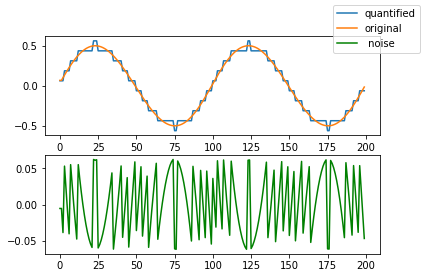

In [ ]:
n_bits = 4
pleine_echelle = 1
file = 'sine440.wav'

real_signal = np.array(sf.read(file, dtype='float64'), dtype=object)
real_signal = real_signal[0]

def get_signal(real_signal, n_bits, pleine_echelle):

  # quantify signal variable
  quantization_output, quant_step, quantizd_value = quantif(real_signal, pleine_echelle, n_bits)

  #convert outputs to array
  signal = np.array(quantization_output, dtype = object)

  # get bruit
  bruit = signal - real_signal

  return signal, bruit

signal, bruit = get_signal(real_signal, n_bits, pleine_echelle)

# Create pyplot figure and axes 
fig, axs = plt.subplots(2)

# ploting signals
axs[0].plot(signal[:200], label = 'quantified')
axs[0].plot(real_signal[:200], label = 'original')
axs[1].plot(bruit[:200], label = ' noise', color = 'green')

fig.legend()
print(max(signal))
print(max(real_signal))

Text(0.5, 0, 'Number of bits')

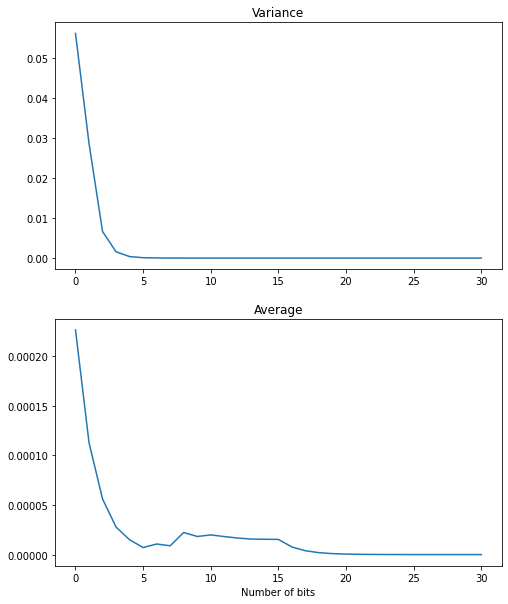

In [ ]:
'''3. Etudier les propriétés statistiques du bruit de quantification (moyenne, variance, etc.) et
caractériser sa densité de probabilité en affichant par exemple l’histogramme de ses valeurs
à l’aide de la commande plt.hist. Comparer les résultats obtenus aux hypothèses posées
en cours.'''

var_list = []
av_list = []

for i in range(1,32):
  
  signal, bruit = get_signal(real_signal, i, pleine_echelle)

  bruit_var = np.var(bruit)
  bruit_av = np.average(bruit)

  var_list.append(bruit_var)
  av_list.append(bruit_av)

fig, axs = plt.subplots(2, figsize = (8,10))

axs[0].title.set_text('Variance')
axs[1].title.set_text('Average')

axs[0].plot(var_list)
axs[1].plot(av_list)

axs[1].set_xlabel('Number of bits')


variance:  0.001561884694935309 , average:  2.763190237032313e-05


Text(0.5, 0, 'noise value')

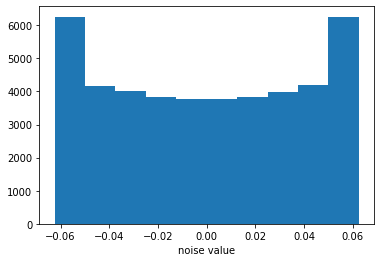

In [ ]:
signal, bruit = get_signal(real_signal, 4, pleine_echelle)

bruit_var = np.var(bruit)
bruit_av = np.average(bruit)

print("variance: ", bruit_var, ", average: ", bruit_av)

plt.hist(bruit)
plt.xlabel('noise value')

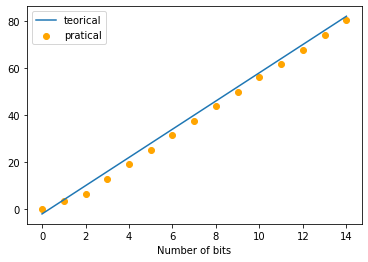

In [ ]:
'''4. Calculer le RSB de quantification pour différentes valeurs du nombre de bits N, tracer le
RSB de quantification obtenu en fonction de N. Comparer à la courbe théorique.'''

from numpy import log
# Find RSB curve

# RSB = var du signal reel / var du bruit

rsb_list = []
theorical_rsb_list = []

signal_var = np.var(real_signal)

F = pleine_echelle/ np.sqrt(signal_var)

for i in np.arange(15):
  
  signal, bruit = get_signal(real_signal, i, pleine_echelle)

  bruit_var = np.var(bruit)

  rsb = 10*np.log10(signal_var/bruit_var)

  rsb_list.append(rsb)

  theorical_rsb = 6*i - log((F**3)/3)

  theorical_rsb_list.append(theorical_rsb)

plt.scatter(np.arange(15), rsb_list, color = 'orange', label = 'pratical')
plt.plot(np.arange(15), theorical_rsb_list, label = 'teorical')
plt.xlabel('Number of bits')
plt.legend()



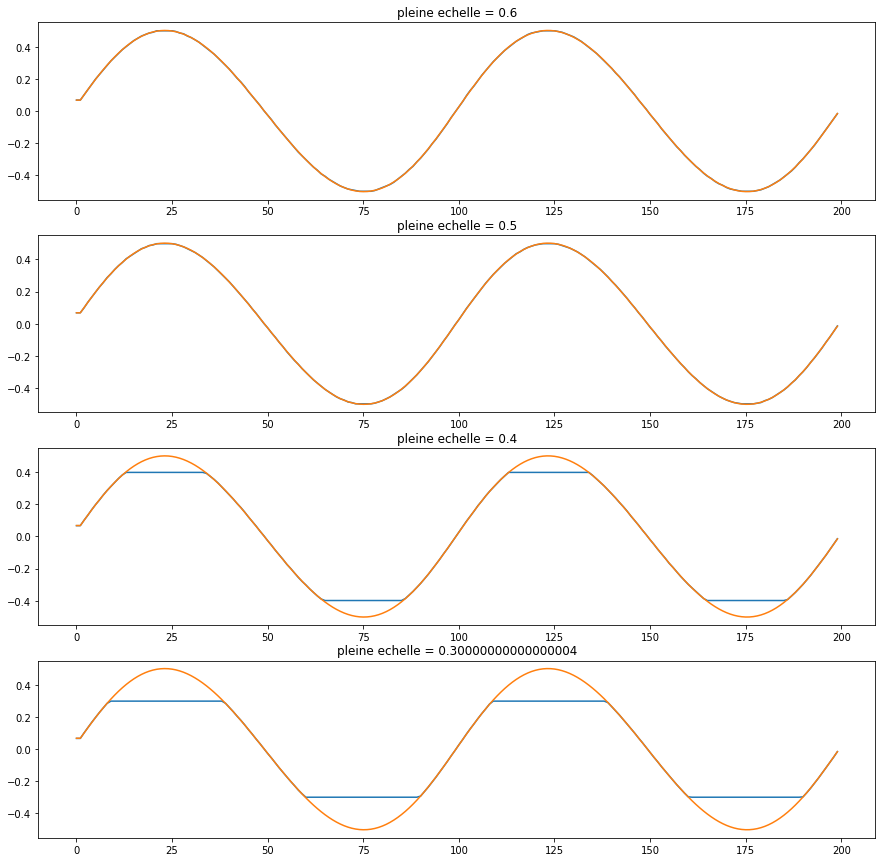

In [ ]:
'''5. Pour N = 8 et pour différentes valeurs de A bien choisies, tracer le signal quantifié et le
comparer à x.
'''
A_values = np.arange(0.6, 0.2, -0.1)

fig, axs = plt.subplots(len(A_values), figsize=(15,15))

for i, A in enumerate(A_values):
  signal, bruit = get_signal(real_signal, 8, A)

  axs[i].plot(signal[:200])
  axs[i].plot(real_signal[:200])
  axs[i].title.set_text(f'pleine echelle = {A}')


/content/quantif.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Q = np.max(np.array([np.min(np.array([np.floor((X-low)/q), np.ones_like(X)*(2**N-1)]), axis = 0), np.zeros_like(X)]), axis = 0)
/content/quantif.py:16: RuntimeWarning: invalid value encountered in true_divide
  Q = np.max(np.array([np.min(np.array([np.floor((X-low)/q), np.ones_like(X)*(2**N-1)]), axis = 0), np.zeros_like(X)]), axis = 0)


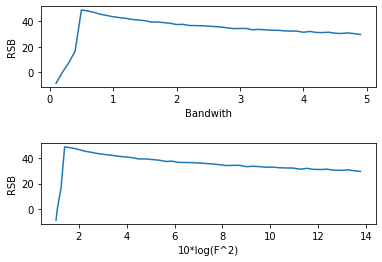

In [ ]:
'''6. (a) Fixer N = 8. Faire varier A sur un intervalle judicieusement choisi, et pour chaque
valeur, calculer le RSB de quantification et le facteur de charge F. Tracer le RSB de
quantification obtenu en fonction de A, puis en fonction du facteur de charge en dB :
10 log(F^2).'''

n_bits = 8

rsb_list = []
db_F2_list = []

for A in np.arange(0,5,0.1):

  signal, bruit = get_signal(real_signal, n_bits, A)

  bruit_var = np.var(bruit)
  signal_var = np.var(signal)


  rsb = 10*np.log10(signal_var/bruit_var)

  F = A/ np.sqrt(signal_var)

  db_F_carre = 10*np.log10(F**2)

  db_F2_list.append(F)
  rsb_list.append(rsb)


fig, axs = plt.subplots(2)

# axs[0].title.set_text('RSB by Bandwidth')
# axs[1].title.set_text('RSB by 10*log(F^2)')

axs[0].plot(np.arange(0,5,0.1), rsb_list)
axs[1].plot(db_F2_list, rsb_list)

axs[0].set_ylabel('RSB')
axs[1].set_ylabel('RSB')

axs[0].set_xlabel('Bandwith')
axs[1].set_xlabel('10*log(F^2)')

plt.subplots_adjust(hspace=0.7)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


[] 

 [-8.94118342901483, 3.4788880105986317, 16.565266341859658, 181.6878028392008, 179.38444454212384, 177.71748426805843, 182.2389775702258, 175.04829155560566, 174.28550026735277, 173.26521144082903, inf, 171.62656736405424, 170.72423488772637, 170.1171127021247, 169.54449710625337, 168.97097549342817, 168.57188694180246, 168.00107084485626, 167.52037689136844, 166.6714971605154, 166.56785399797283, 166.20199880273634, 165.7067821049351, 165.33270502654653, 165.21486601826805, 164.6695023069285, inf, 164.0667842668478, 163.73029838858045, 163.65198693995353, 163.19576079122538, 162.94035731789347, 162.66420703765777] 

 [1.0448555999009344, 1.1288445397677898, 1.2539518782525902, 1.5479961422215125, 1.9701769080660663, 2.3923576746432693, 2.814538440168687, 3.236719206674437, 3.6588999728096745, 4.081080739645577, 4.503261505009334, 4.925442271076784, 5.347623036963533, 5.769803802734143, 6.191984570636399, 6.614165335537651, 7.036346100628669, 7.458526867269024, 7.880707632259014,

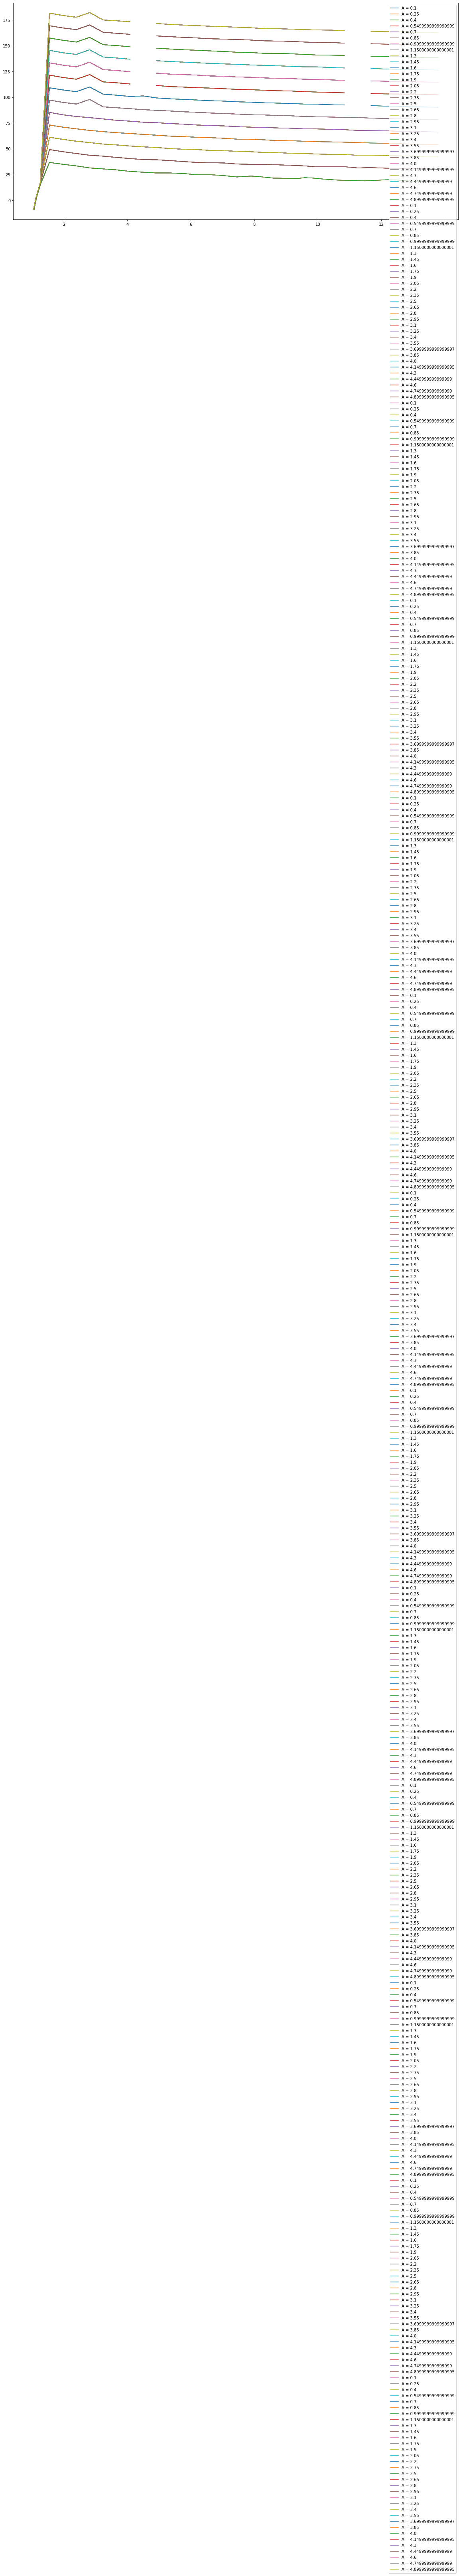

In [ ]:
'''6. (b) Modifier le nombre de bits N et tracer pour chaque valeur le RSB de quantification
en fonction de 10 log(F^2). Interpréter les courbes obtenues et les comparer à celles
données en cours '''

pleine_echelle = 1

plt.figure(figsize=(20,10))

for i,N in enumerate(np.arange(6,32,2)):
  rsb_list = []
  db_F2_list = []
  theorical_rsb_list = [] 

  for A in np.arange(0.1,5,0.15):

    signal, bruit = get_signal(real_signal, N, A)

    bruit_var = np.var(bruit)
    signal_var = np.var(signal)


    rsb = 10*np.log10(signal_var/bruit_var)

    F = A/ np.sqrt(signal_var)

    db_F_carre = 10*np.log10(F**2)

    db_F2_list.append(F)
    rsb_list.append(rsb)

    plt.plot(db_F2_list, rsb_list, label = f'A = {A}')

plt.legend()


print(theorical_rsb_list, '\n\n', rsb_list, '\n\n', db_F2_list)


'Com valores excessivamente baixos de Litmite de escala, passamos a ter um sinal\nconstante onde na verdade esse sinal ultrapassaria a banda. Com esses sinais constantes\na variancia passa a ser muito menor'

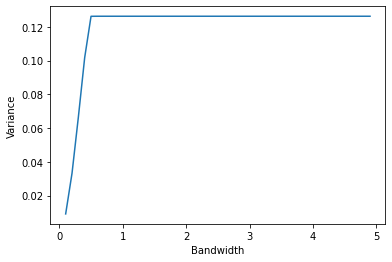

In [ ]:
''' 6 (c) Quelles sont les conséquences d’une pleine échelle trop faible par rapport à la variance
du signal x ?
 '''

var_list = []

for A in np.arange(0.1,5,0.1):

  signal, bruit = get_signal(real_signal, N, A)

  signal_var = np.var(signal)


  var_list.append(signal_var)

plt.plot(np.arange(0.1,5,0.1), var_list)

plt.xlabel('Bandwidth')
plt.ylabel('Variance')


'''Com valores excessivamente baixos de Litmite de escala, passamos a ter um sinal
constante onde na verdade esse sinal ultrapassaria a banda. Com esses sinais constantes
a variancia passa a ser muito menor'''

In [ ]:
x_R = np.array(sf.read('rythmique.wav', dtype='float64'), dtype=object)

In [ ]:
import wave
import contextlib
fname = 'rythmique.wav'
with contextlib.closing(wave.open(fname,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)
    print(duration)
    print(rate)

# Podemos ver que o sinal foi obtido com uma frequencia de 48000 Hz

8.1378125
48000


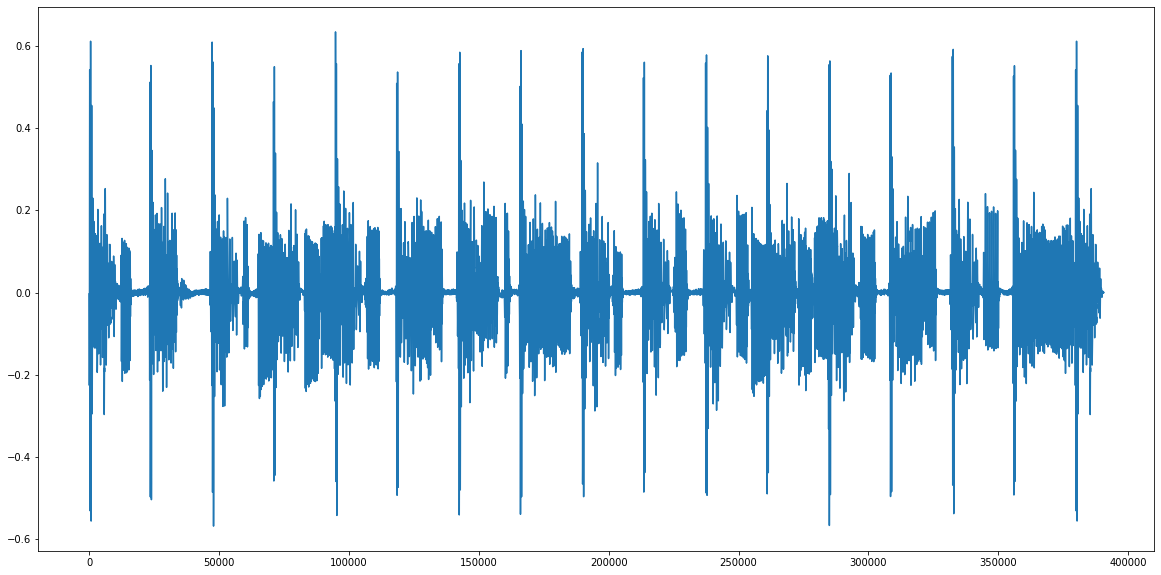

In [ ]:
'''
2. Pour N = 4 et A = 1, tracer le signal quantifié et le bruit de quantification
'''

n_bits = 4
pleine_echelle = 1

# read sound file
x_R = np.array(sf.read('rythmique.wav', dtype='float64'), dtype=object)

x_R = x_R[0]

# Create pyplot figure and axes 
fig, axs = plt.subplots(1, figsize = (20,10))

# ploting signals
axs.plot(x_R[50:,0])


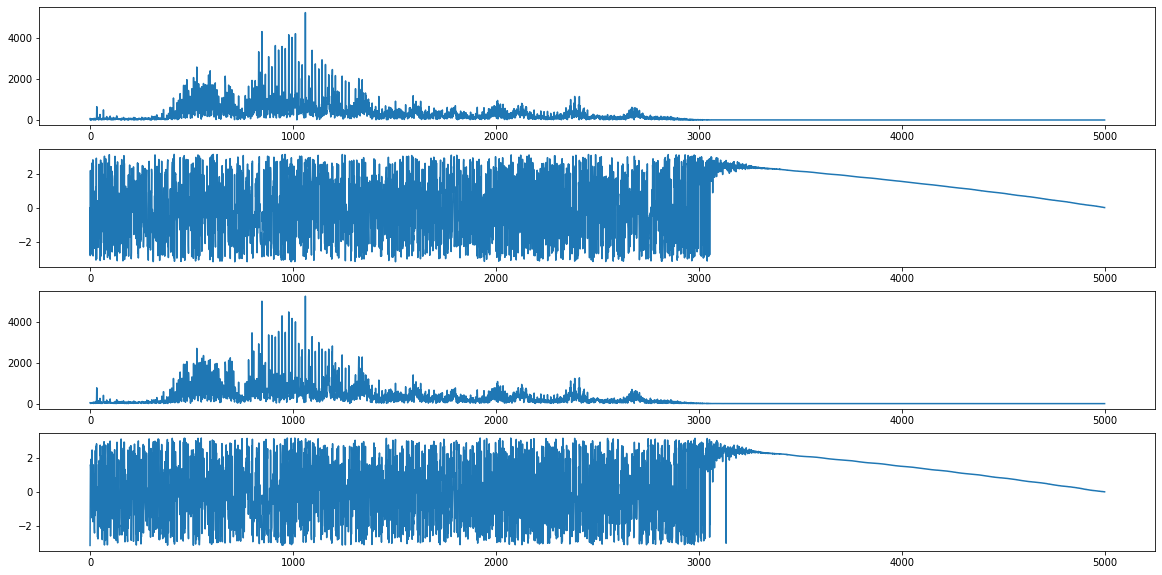

In [ ]:
'''3. Calculer et afficher son spectre : module en dB et phase, avec un axe fréquentiel linéaire.
Sur quel intervalle de fréquence se trouve l’information (musicale) ? En déduire la fréquence
d’échantillonnage minimale pouvant être utilisée pour un tel enregistrement. Elle sera notée
F_min_s dans la suite du TP.'''

from scipy.fft import fft

fft_x_R_1 = fft(x_R[:,0])
fft_x_R_2 = fft(x_R[:,1])

magnitude_1 = np.abs(fft_x_R_1)
phase_1 = np.angle(fft_x_R_1)

magnitude_2 = np.abs(fft_x_R_2)
phase_2 = np.angle(fft_x_R_2)

fig, axs = plt.subplots(4, figsize=(20,10))
axs[0].plot(magnitude_1[:5000])
axs[1].plot(phase_1[:5000])
axs[2].plot(magnitude_2[:5000])
axs[3].plot(phase_2[:5000])


teste = magnitude_1[:]
# Resolução da T de fourier é igual a frequencia de amostragem dividido pelo numero de amostras:
# 48000 / 390615 = 0.1228831458085327 Hz
# Podemos ver um pico na frequencia de 2670 * 0.123 = 328.41 Hz. logo, segundo o
# teorema de Shannon, a frequencia minima deve ser de 656.82 Hz

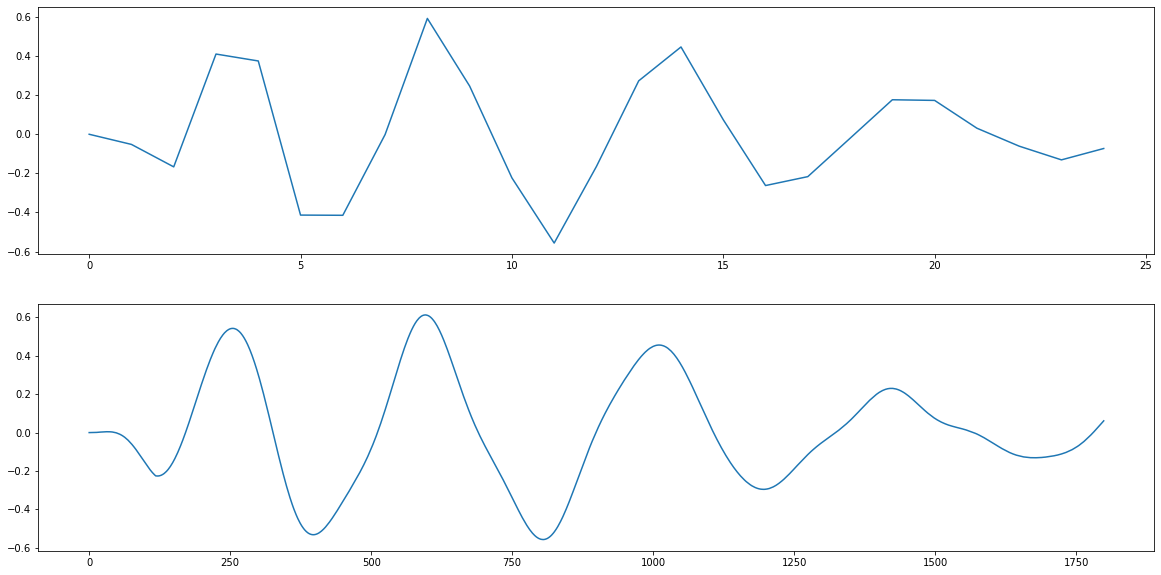

In [ ]:
'''4. Afin de simuler un échantillonnage à la fréquence F_min_s, on choisit de sous-échantillonner
le signal x_R d’un facteur N. Cette opération consiste à prélever dans x_R : 1 échantillon
tous les N échantillons et à le copier dans un nouveau signal noté x_R_dec : ∀k ∈ Z, xR_dec[k] = x_R[1 + (k − 1)N].
Déterminer le facteur N simulant un échantillonnage à la fréquence la plus proche possible de F_min_s
. Construire le signal sous-échantillonné x_R_dec.'''

N = round(48000 / 656.82)

x_R_dec = x_R[::N]

fig, axs = plt.subplots(2, figsize=(20,10))

axs[0].plot(x_R_dec[:round(1800/N),0])
axs[1].plot(x_R[:1800,0])

# plt.plot(magnitude_1[:5000])

0.9035311749146933 84.62931669624642


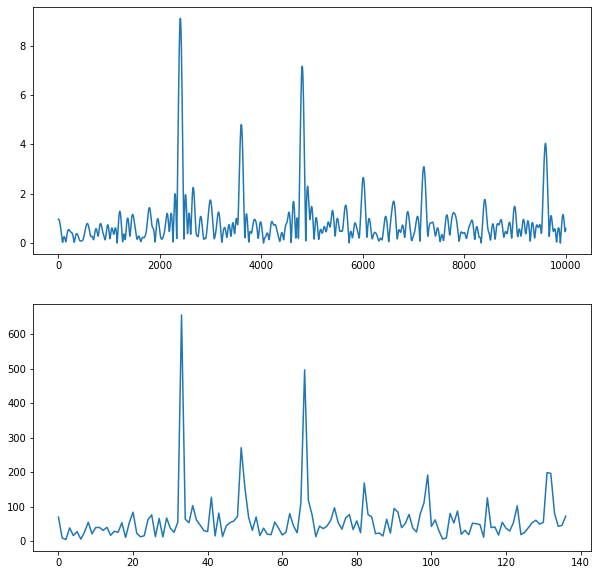

In [ ]:
'''6. Calculer le spectre de x_R_dec (module et phase) sur un nombre de points fréquentiels égal
à celui de x_R. Quel est l’effet du sous-échantillonnage sur l’amplitude et la position des composantes fréquentielles ?'''

len_x_R_dec = len(x_R_dec)
dif_len = len(x_R) - len(x_R_dec)

zeros = np.zeros((dif_len, 2))

c = np.concatenate((x_R_dec, zeros))

fft_x_R = fft(c[:,0])

magnitude_1 = np.abs(fft_x_R)
phase_1 = np.angle(fft_x_R)

fig, axs =plt.subplots(2, figsize = (10,10))
axs[0].plot(magnitude_1[:10000])
axs[1].plot(teste[:round(10000/N)])

print(magnitude_1[20], teste[20])

[0.         0.         0.         ... 0.00088501 0.00088501 0.00085449]
(500000,)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


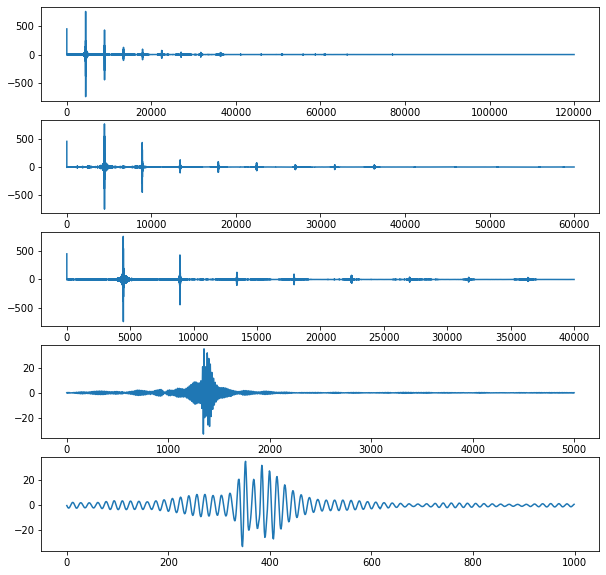

In [ ]:
'''8. Charger maintenant le signal audio piano.wav (ce signal est noté x_P ) et répéter les étapes précédentes.'''

x_p = np.array(sf.read('piano.wav', dtype='float64'), dtype=object)

x_p = x_p[0]
fft_piano = fft(x_p)
print(x_p)
print(np.shape(x_p))

# plt.plot(fft_piano[0000:120000])
# plt.plot(piano_signal[30000:35000])

fig, axs =plt.subplots(5, figsize = (10,10))
axs[0].plot(fft_piano[0000:120000])
axs[1].plot(fft_piano[0000:60000])
axs[2].plot(fft_piano[0000:40000])
axs[3].plot(fft_piano[35000:40000])
axs[4].plot(fft_piano[36000:37000])

# frequencia de amostragem piano: Asasd
# Resolução fft_piano = frequencia 
# Notamos que temos uma frequencia relativamnte presente em 36400, entao o F_min = 2*36400

In [ ]:
import wave
import contextlib
fname = 'piano.wav'
with contextlib.closing(wave.open(fname,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)
    print("duration: ", duration)
    print("rate: ", rate)
    print("frames: ", frames)

duration:  11.337868480725623
rate:  44100
frames:  500000


In [ ]:
'''9. Quelle est la fréquence F_min_s minimale pouvant être utilisée pour 
échantillonner ce signal audio ?'''

# frequencia de amostragem piano: 44100
# Resolução fft_piano = frequencia/numero de amostras = 44100/500000 = 0.0882 Hz
# Notamos que temos uma frequencia relativamnte presente em 36400*0.0882 = 3210.48 Hz,
# entao o F_min_s = 2*3210.48 = 6420.96 Hz

F_res = 44100/500000
F_min_s = 2*36400*0.0882


Text(0.5, 1.0, 'Freq = 1024 Hz: x_P2')

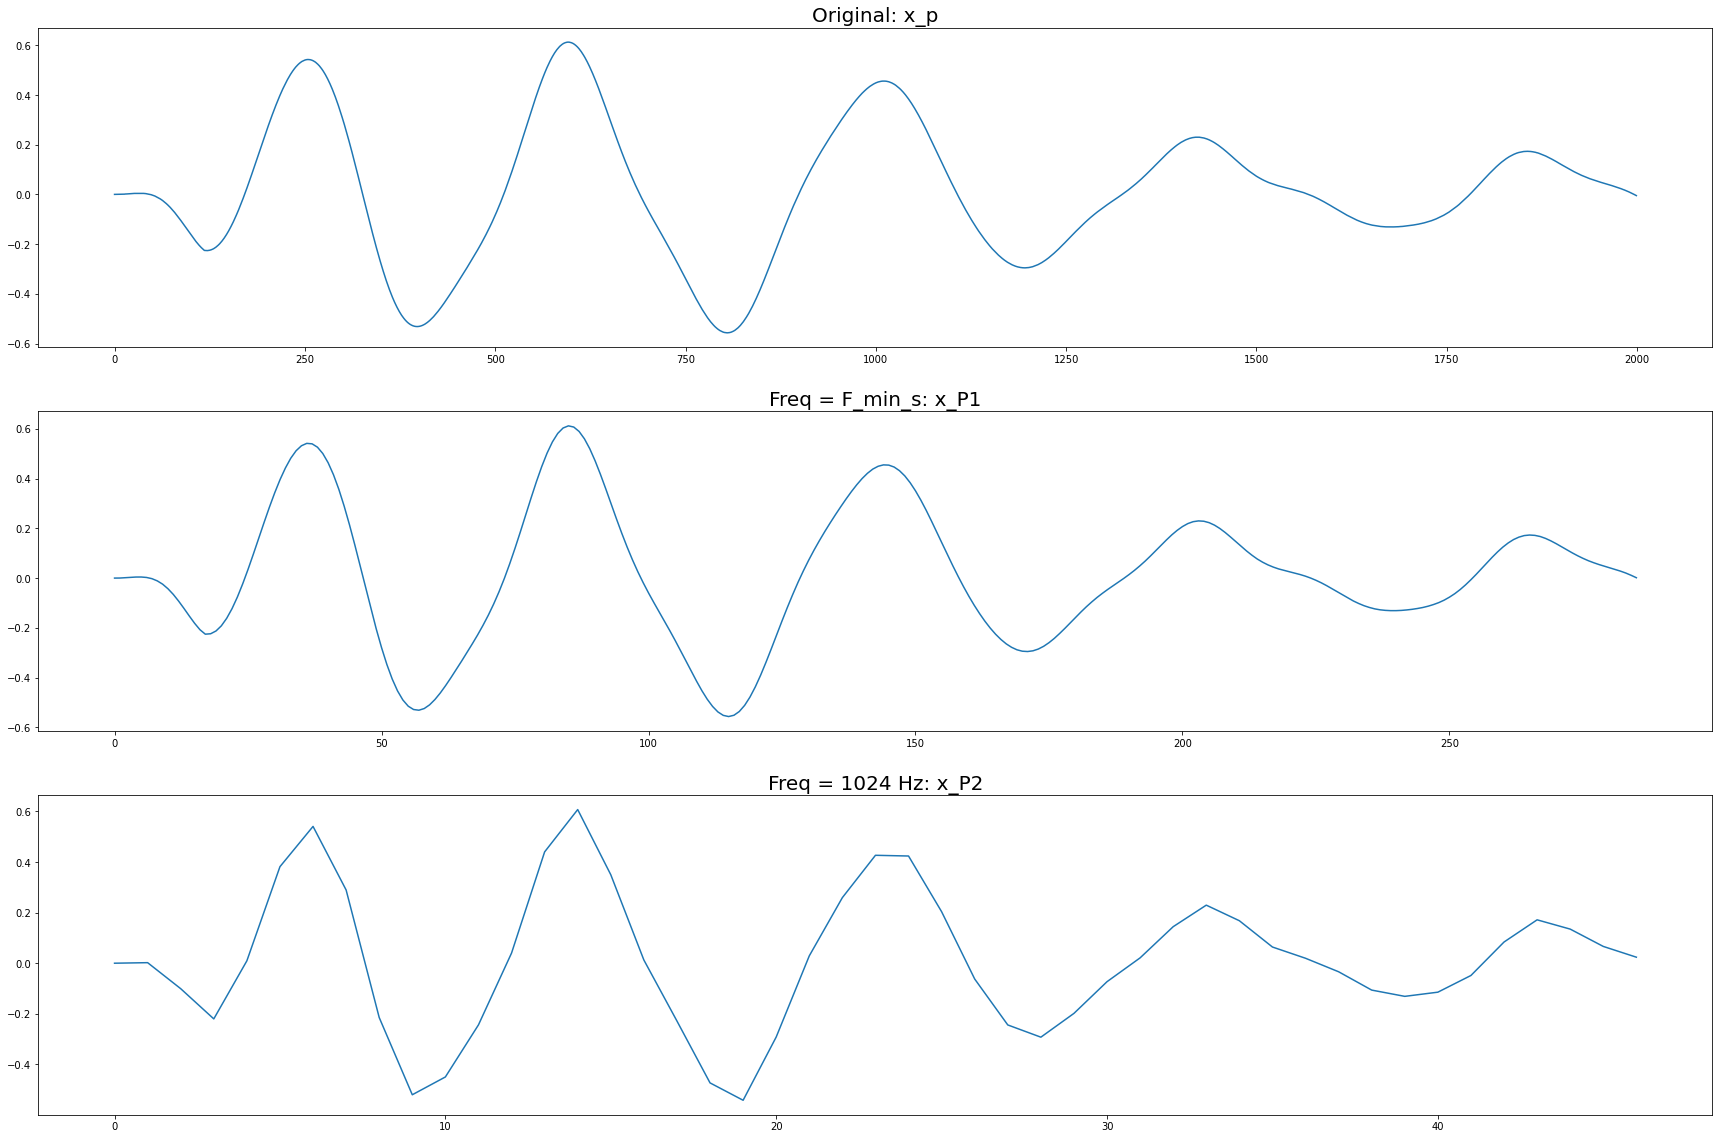

In [ ]:
'''10. Sous-échantillonner le signal à la fréquence F_min_s, puis à la fréquence
 1024 Hz. Les signaux obtenus sont notés x_P1_dec et x_P2_dec. Comparer les 
 spectres de x_P1_dec et x_P2_dec à celui de x_P .
'''

N_1 = round(44100 / F_min_s)
N_2 = round(44100 / 1024)

index_limit = 2000

x_P1_dec = x_R[::N_1]
x_P2_dec = x_R[::N_2]

fig, axs = plt.subplots(3, figsize=(30,20))

axs[0].plot(x_R[:index_limit,0])
axs[1].plot(x_P1_dec[:round(index_limit/N_1),0])
axs[2].plot(x_P2_dec[:round(index_limit/N_2),0])


axs[0].set_title('Original: x_p', fontsize = 20)
axs[1].set_title('Freq = F_min_s: x_P1', fontsize = 20)
axs[2].set_title('Freq = 1024 Hz: x_P2', fontsize = 20)
